In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(rc={'image.cmap': 'coolwarm'})

# Ingesting the train and test data

In [3]:
df_train = pd.read_csv("adult-pmr3508/train_data.csv")
df_test = pd.read_csv("adult-pmr3508/test_data.csv")
df_train = df_train.replace('?', np.nan)
df_test = df_test.replace('?', np.nan)

In [4]:
df_train.head()

,Id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,16280,34,Private,204991,Some-college,10,Divorced,Exec-managerial,Own-child,White,Male,0,0,44,United-States,<=50K
1,16281,58,Local-gov,310085,10th,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
2,16282,25,Private,146117,Some-college,10,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,42,United-States,<=50K
3,16283,24,Private,138938,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
4,16284,57,Self-emp-inc,258883,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,5178,0,60,Hungary,>50K


# EDA

## Removing duplicates

In [5]:
df_train = df_train.drop_duplicates()
df_test = df_test.drop_duplicates()

## Relevant information about the data

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32560 entries, 0 to 32559
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              32560 non-null  int64 
 1   age             32560 non-null  int64 
 2   workclass       30724 non-null  object
 3   fnlwgt          32560 non-null  int64 
 4   education       32560 non-null  object
 5   education.num   32560 non-null  int64 
 6   marital.status  32560 non-null  object
 7   occupation      30717 non-null  object
 8   relationship    32560 non-null  object
 9   race            32560 non-null  object
 10  sex             32560 non-null  object
 11  capital.gain    32560 non-null  int64 
 12  capital.loss    32560 non-null  int64 
 13  hours.per.week  32560 non-null  int64 
 14  native.country  31977 non-null  object
 15  income          32560 non-null  object
dtypes: int64(7), object(9)
memory usage: 4.2+ MB


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16280 entries, 0 to 16279
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              16280 non-null  int64 
 1   age             16280 non-null  int64 
 2   workclass       15317 non-null  object
 3   fnlwgt          16280 non-null  int64 
 4   education       16280 non-null  object
 5   education.num   16280 non-null  int64 
 6   marital.status  16280 non-null  object
 7   occupation      15314 non-null  object
 8   relationship    16280 non-null  object
 9   race            16280 non-null  object
 10  sex             16280 non-null  object
 11  capital.gain    16280 non-null  int64 
 12  capital.loss    16280 non-null  int64 
 13  hours.per.week  16280 non-null  int64 
 14  native.country  16006 non-null  object
dtypes: int64(7), object(8)
memory usage: 2.0+ MB


We see that the missing data is shared by the same columns in train and test data

In [8]:
df_train.isna().sum()

Id                   0
age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [9]:
df_train.describe()

,Id,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,32559.500000,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,9399.406719,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,16280.000000,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,24419.750000,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,32559.500000,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,40699.250000,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,48839.000000,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Income

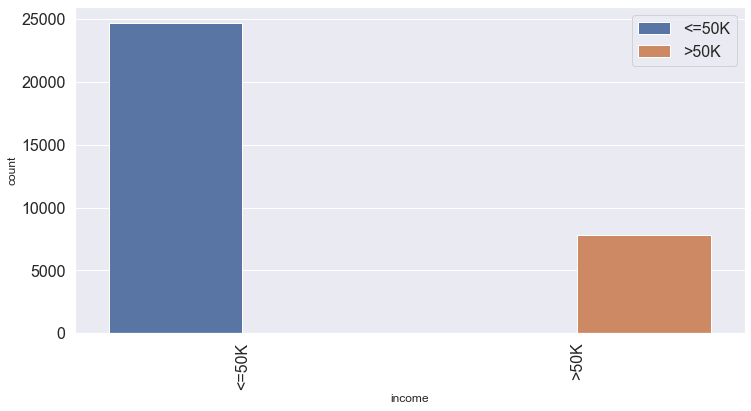

In [10]:
plt.figure(figsize=(12,6))
sns.countplot(data=df_train,x='income', hue=df_train['income'])
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

## Numerical variables

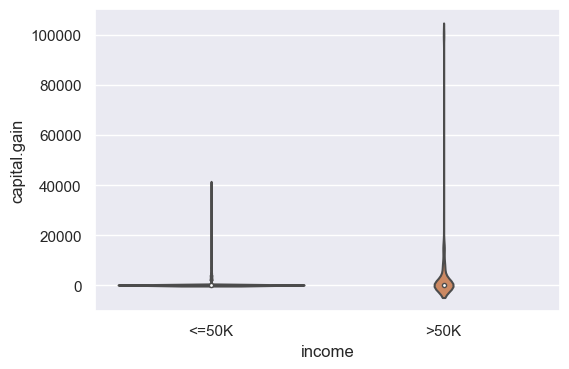

In [11]:
plt.figure(dpi=100)
sns.violinplot(x="income", y="capital.gain", data=df_train, kind='boxen');
plt.show()

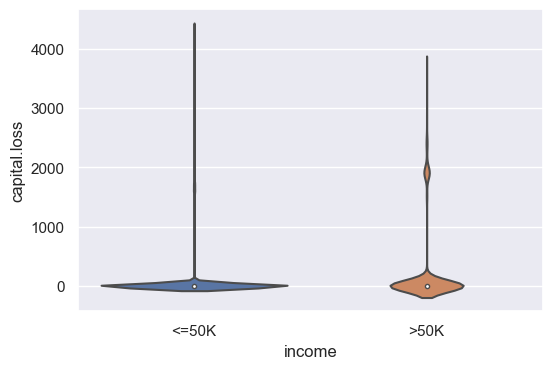

In [12]:
plt.figure(dpi=100)
sns.violinplot(x="income", y="capital.loss", data=df_train, kind='boxen');
plt.show()

**We can see that capital.loss and capital.gain contain outlier data. Then it will be necessary to normalize the data using a scaler.**

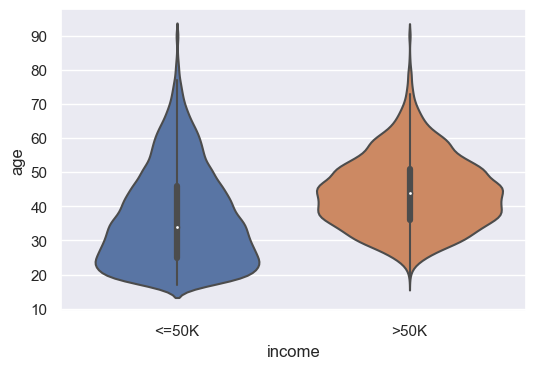

In [13]:
plt.figure(dpi=100)
sns.violinplot(x="income", y="age", data=df_train);

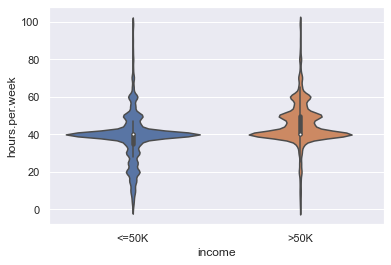

In [14]:
sns.violinplot(x="income", y="hours.per.week", kind="boxen", data=df_train);


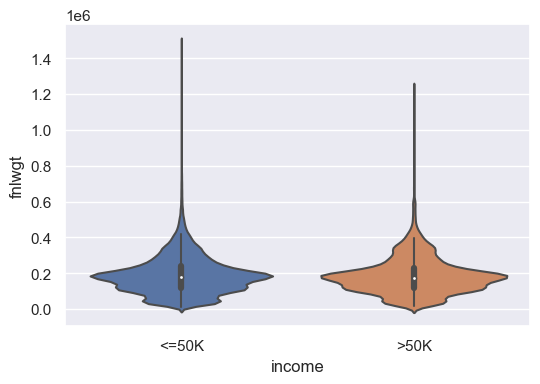

In [15]:
plt.figure(dpi=100)
sns.violinplot(x="income", y="fnlwgt", data=df_train);

### Correlation between numeric variables

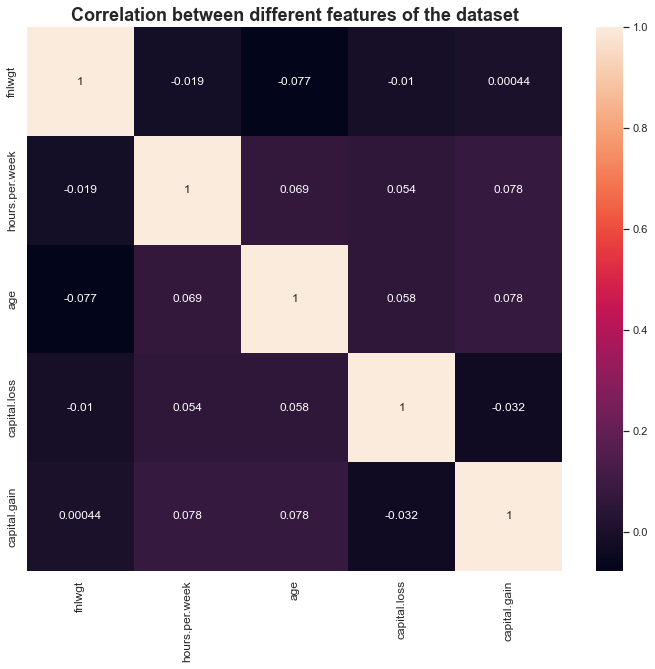

In [16]:
plt.figure(figsize = (12,10))
plt.title("Correlation between different features of the dataset", fontsize = 18, fontweight = 'bold')
sns.heatmap(df_train[['fnlwgt', 'hours.per.week','age', 'capital.loss', 'capital.gain']].corr(), annot = True)
plt.xticks(fontsize=12, rotation = 90)
plt.yticks(fontsize=12, rotation = 90)
#plt.legend(fontsize=12)
plt.show()

No relevant correlation

## Categorical variables

### Native.country

**We can see that the native.country features is very unbalenced. Hence, the idea is to create a encoding for native.country to aggregate countries (minus US because of the sample size) between the income mean in each one of them. I will set groups of 5 countries, thefore, we have a more balenced feature.**

In [17]:
(df_train['native.country'].value_counts()).head()

United-States    29169
Mexico             643
Philippines        198
Germany            137
Canada             121
Name: native.country, dtype: int64

In [18]:
def native_country_to_groups(n_groups, df, df_test):
    
    if 40%n_groups:
        print("Must be a integer divisor of 40")
        return df
    
    encoding = int(n_groups)

    # agg native.coutry with income mean 
    countries = ( (((df.replace({'<=50K': 0, '>50K' : 1}).groupby(['native.country']).mean()).income)
     .sort_values(ascending=False)).drop('United-States') )

    #print(countries.head(),'\n')

    for i in range(1,len(countries) + 1):
        
        if i%(n_groups) == 0:
            
            for j in range(n_groups,0,-1):
                
                df = df.replace({countries.index[encoding -j] : (i)})
                df_test = df_test.replace({countries.index[encoding -j] : (i)})

            encoding += n_groups
        
    # Encoding US 
    df = df.replace('United-States' , int(0) )
    df_test = df_test.replace('United-States' , int(0) )
    
    return df,df_test

In [19]:
df_train,df_test = native_country_to_groups(5,df_train, df_test)

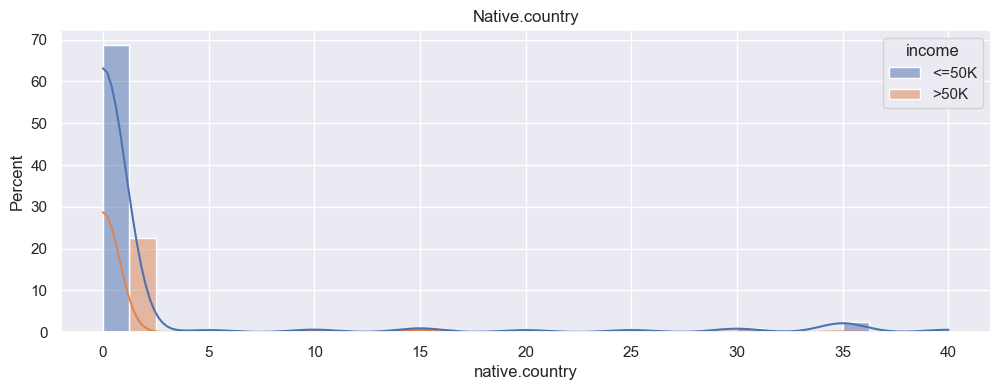

In [20]:
plt.figure(figsize=(12,4),dpi=100)
sns.histplot(data=df_train, x="native.country",multiple="dodge", kde=True, stat='percent', hue='income')
plt.title('Native.country')
plt.show()

### Workclass

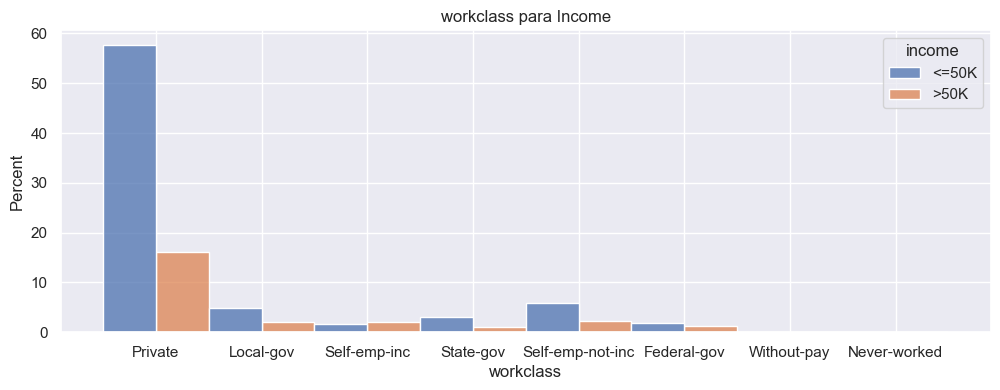

In [21]:
plt.figure(figsize=(12,4),dpi=100)
sns.histplot(data=df_train, x="workclass",multiple="dodge", kde=False, stat='percent', hue='income')
plt.title('workclass para Income')
plt.show()

### Occupation

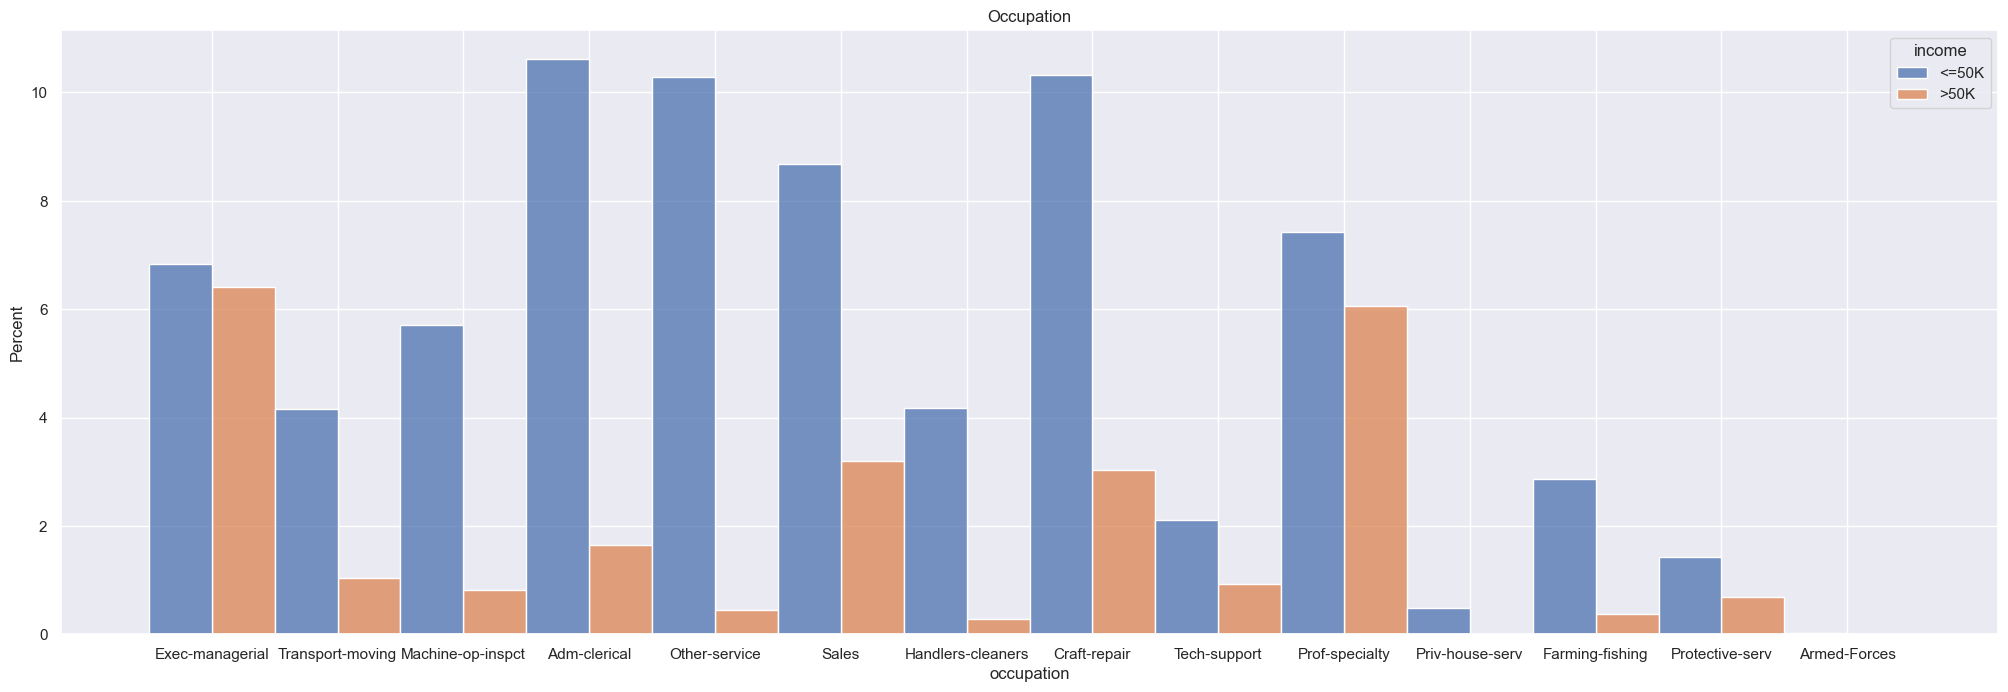

In [22]:
plt.figure(figsize=(25,8),dpi=100)
sns.histplot(data=df_train, x="occupation",multiple="dodge", kde=False, stat='percent', hue='income')
plt.title('Occupation')
plt.show()

### education

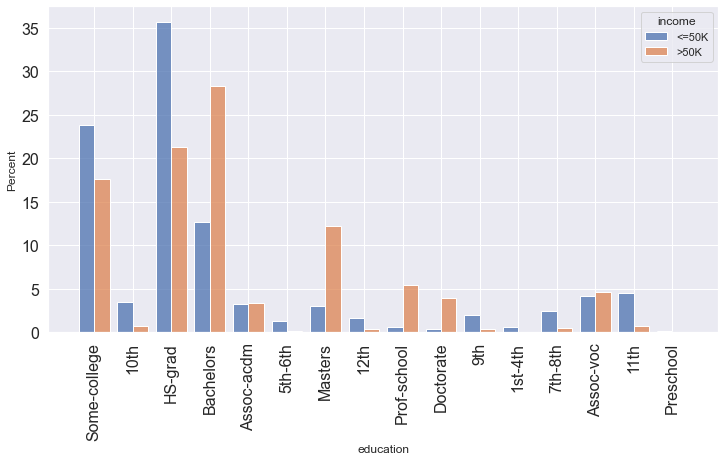

In [23]:
plt.figure(figsize=(12,6))
sns.histplot(x = df_train['education'], hue=df_train['income'], multiple="dodge", stat = 'percent', shrink = 0.8, common_norm=False)
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.show()

### education.num

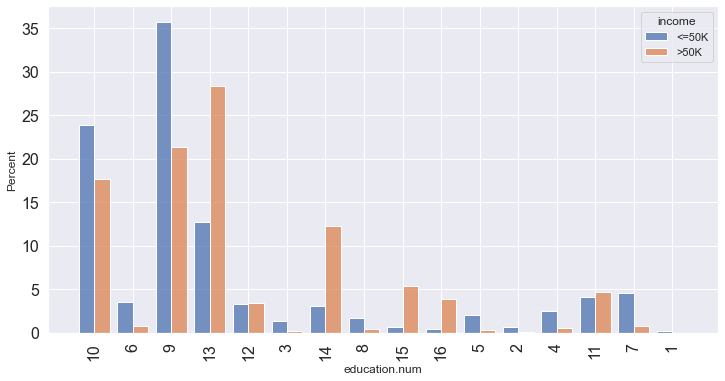

In [24]:
plt.figure(figsize=(12,6))
sns.histplot(x = df_train['education.num'].astype(str), hue=df_train['income'], multiple="dodge", stat = 'percent', shrink = 0.8, common_norm=False)
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.show()

We can see that education number is calculate using education. Hence, this variables represent the information

In [25]:
df_train = df_train.drop(columns=['education'])
df_test = df_test.drop(columns=['education'])

### marital.status

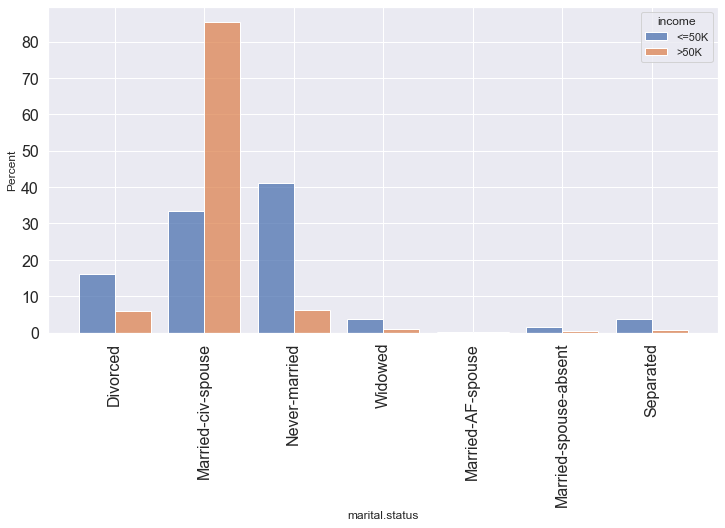

In [26]:
plt.figure(figsize=(12,6))
sns.histplot(x = df_train['marital.status'], hue=df_train['income'], multiple="dodge", stat = 'percent', shrink = 0.8, common_norm=False)
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.show()

### relationship

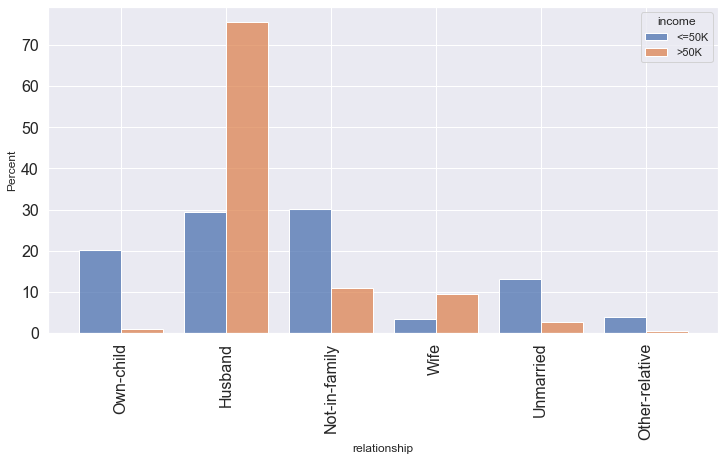

In [27]:
plt.figure(figsize=(12,6))
sns.histplot(x = df_train['relationship'], hue=df_train['income'], multiple="dodge", stat = 'percent', shrink = 0.8, common_norm=False)
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.show()

### sex

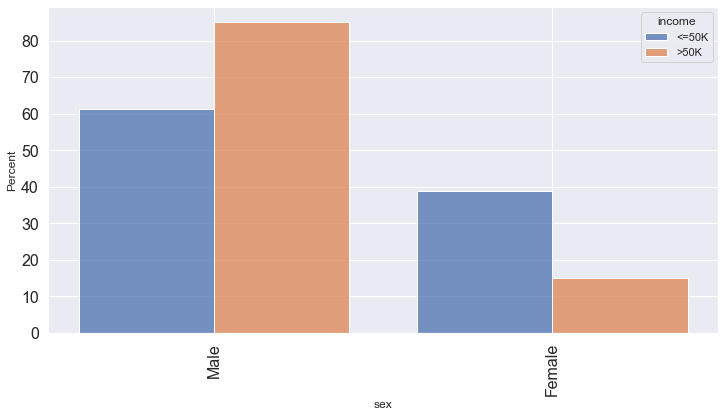

In [28]:
plt.figure(figsize=(12,6))
sns.histplot(x = df_train['sex'], hue=df_train['income'], multiple="dodge", stat = 'percent', shrink = 0.8, common_norm=False)
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.show()

### race 

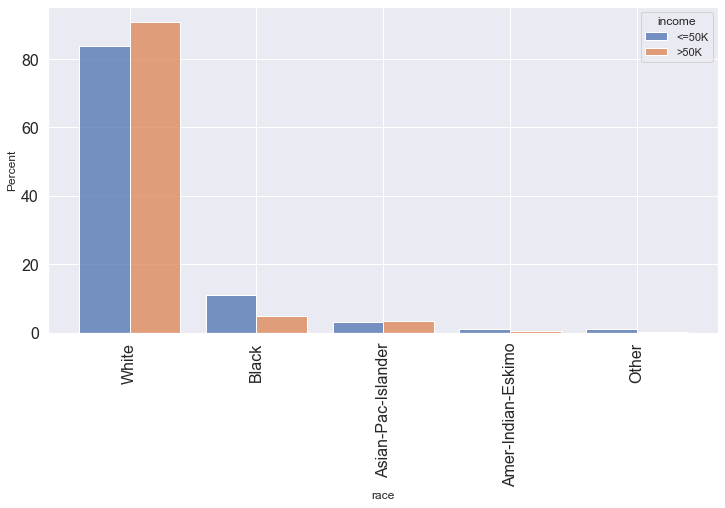

In [29]:
plt.figure(figsize=(12,6))
sns.histplot(x = df_train['race'], hue=df_train['income'], multiple="dodge", stat = 'percent', shrink = 0.8, common_norm=False)
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.show()

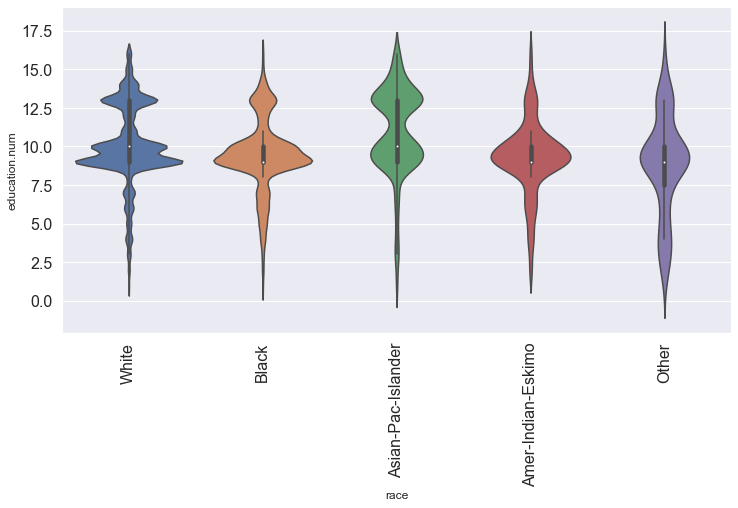

In [30]:
plt.figure(figsize=(12,6))
sns.violinplot(x='race', y='education.num', data=df_train, notch = True)
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.show()

### Visualizing relation between variables

<Figure size 864x864 with 0 Axes>

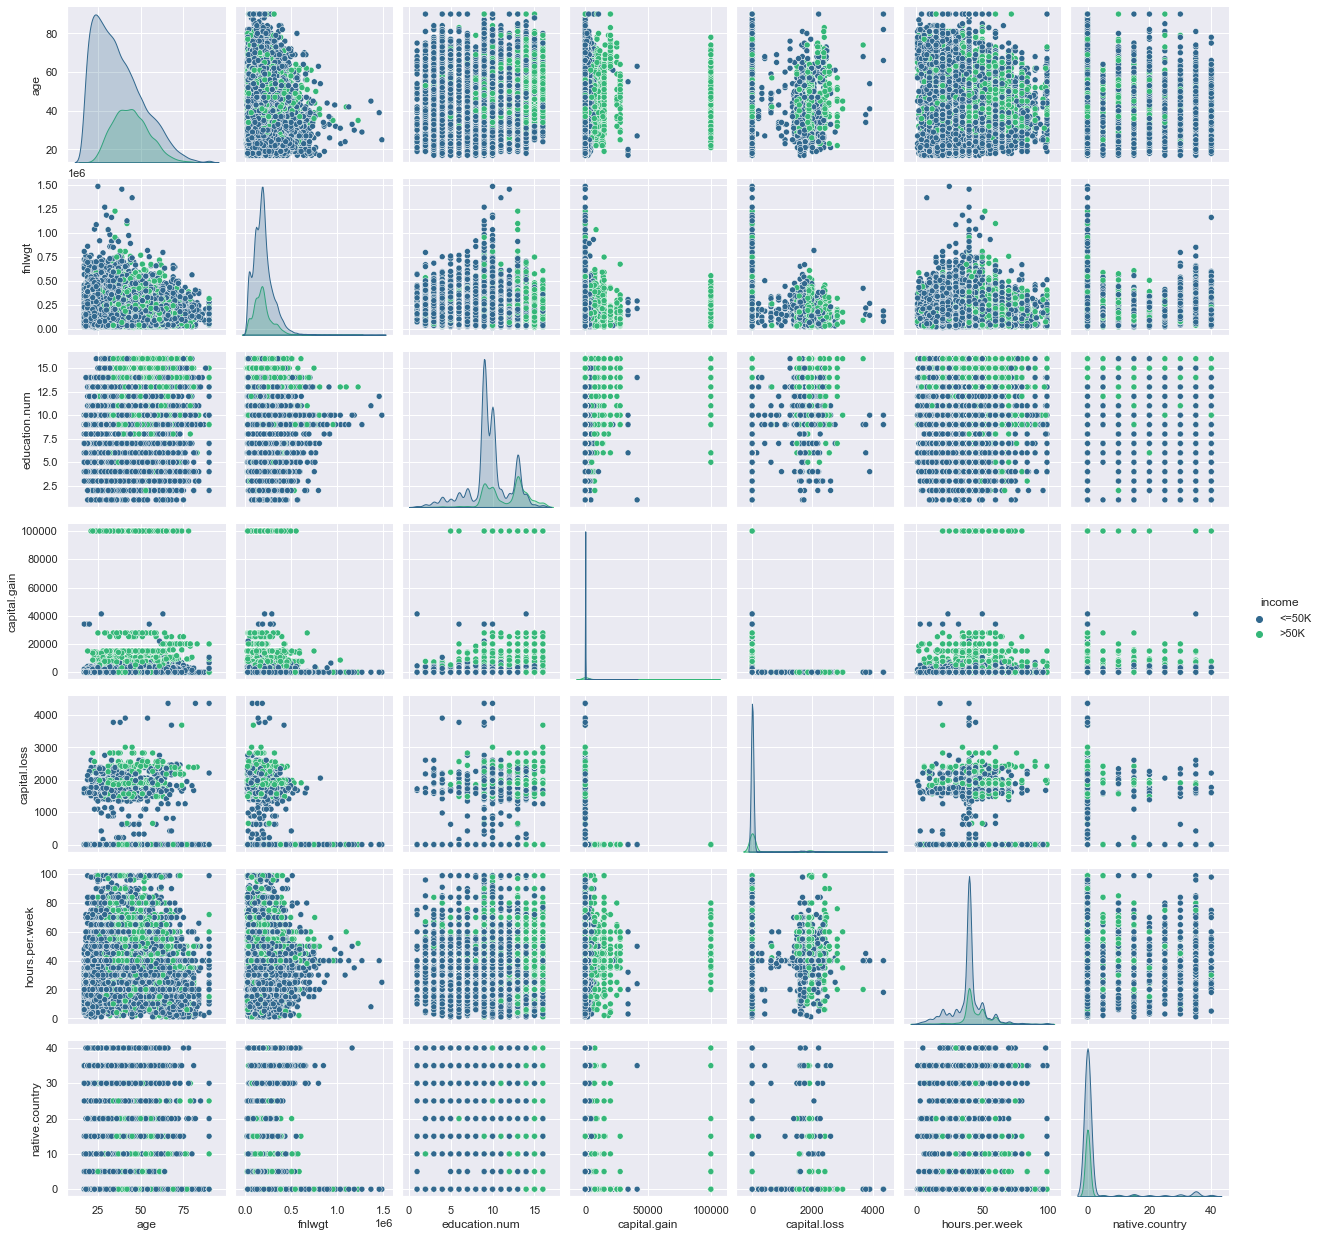

In [31]:
#Seaborn pair plot
plt.figure(figsize=(12,12))
sns.pairplot(df_train.drop(columns=['Id']), hue='income',palette="viridis")
plt.show()

# Pre-processing

## Removing features

Some features may present ethical conflicts in the model, so I decided to remove them even though they may increase accuracy

In [32]:
df_train = df_train.drop(columns=['race','sex'])
df_test = df_test.drop(columns=['race','sex'])


Also removing Id

In [33]:
df_train = df_train.drop(columns=['Id'])
#df_test = df_test.drop(columns=['Id'])

## Encoding categorical variables into numeric variables

In [34]:
# Importing the LabelEncoder and Pipeline
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()

encoding_columns = ['income','workclass','marital.status','occupation','relationship']


for col in encoding_columns:
    df_train[col] = le.fit_transform(df_train[col].astype(str))
    if col != 'income' :
        df_test[col] = le.fit_transform(df_test[col].astype(str))

## Missing values

***From EAD:***

**Workclass** and **Native.country** are multi modal distribution, hence, I'm going to input the missing values using KNN to predict values

**Occupation** distribution for >50K and <=50k are very different, hence, I'm going to use KNN to predict values 

In [35]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_train[['native.country','occupation', 'workclass']] = imputer.fit_transform(df_train[['native.country','occupation', 'workclass']])
df_test[['native.country','occupation', 'workclass']] = imputer.fit_transform(df_test[['native.country','occupation', 'workclass']])

## Scaling features

EDA reveal to us that some variables are very sparse, hence we need to adopt different scale techniques to avoid outliers influencing the scale 

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

scaler = StandardScaler()
sparse_scaler = RobustScaler()

Standard_scaler = ['age', 'workclass', 'fnlwgt', 'education.num',
                   'marital.status', 'occupation', 'relationship','hours.per.week','native.country']

Robust_scaler = ['capital.gain', 'capital.loss']

df_train[Standard_scaler] = scaler.fit_transform(df_train[Standard_scaler])
df_test[Standard_scaler] = scaler.fit_transform(df_test[Standard_scaler])

df_train[Robust_scaler] = sparse_scaler.fit_transform(df_train[Robust_scaler])
#df_train[Robust_scaler] = scaler.fit_transform(df_train[Robust_scaler])
df_test[Robust_scaler] = sparse_scaler.fit_transform(df_test[Robust_scaler])



In [37]:
df_train.head()

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,capital.gain,capital.loss,hours.per.week,native.country,income
0,-0.335886,-0.237861,0.144097,-0.031325,-1.734026,-0.790570,0.966924,0.0,0.0,0.288524,-0.277137,0
1,1.423589,-1.502107,1.139794,-1.586131,-0.406183,1.519714,-0.900177,0.0,0.0,-0.035430,-0.277137,0
2,-0.995689,-0.237861,-0.413696,-0.031325,0.921660,-0.097485,-0.277810,0.0,0.0,0.126547,-0.277137,0
3,-1.069001,-0.237861,-0.481712,-0.031325,-1.734026,-1.483655,-0.277810,0.0,0.0,-0.035430,-0.277137,0
4,1.350277,0.394261,0.654689,-0.420027,-0.406183,1.519714,-0.900177,5178.0,0.0,1.584340,2.404345,1


In [38]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16280 entries, 0 to 16279
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              16280 non-null  int64  
 1   age             16280 non-null  float64
 2   workclass       16280 non-null  float64
 3   fnlwgt          16280 non-null  float64
 4   education.num   16280 non-null  float64
 5   marital.status  16280 non-null  float64
 6   occupation      16280 non-null  float64
 7   relationship    16280 non-null  float64
 8   capital.gain    16280 non-null  float64
 9   capital.loss    16280 non-null  float64
 10  hours.per.week  16280 non-null  float64
 11  native.country  16280 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 1.6 MB


In [39]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32560 entries, 0 to 32559
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32560 non-null  float64
 1   workclass       32560 non-null  float64
 2   fnlwgt          32560 non-null  float64
 3   education.num   32560 non-null  float64
 4   marital.status  32560 non-null  float64
 5   occupation      32560 non-null  float64
 6   relationship    32560 non-null  float64
 7   capital.gain    32560 non-null  float64
 8   capital.loss    32560 non-null  float64
 9   hours.per.week  32560 non-null  float64
 10  native.country  32560 non-null  float64
 11  income          32560 non-null  int64  
dtypes: float64(11), int64(1)
memory usage: 3.2 MB


# Modelling

## Imports

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
from sklearn.model_selection import RandomizedSearchCV

models = {}

Creating feature and target arrays

In [41]:
X_train = df_train.iloc[:, df_train.columns != 'income']
y_train = df_train.iloc[:, df_train.columns == 'income']
X_test = df_test

## Defining the scoring methods

In [42]:
scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_macro': 'recall_macro',
          'f1' : 'f1_macro'}

## Dummy Classifier

Dummy Classifier to evaluate the accuracy just predicting the most frequent class

In [43]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='most_frequent', random_state=0)

scores = cross_validate(dummy, X_train, y_train, cv=5,scoring=scoring)
#print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

/opt/homebrew/Caskroom/miniforge/base/envs/core/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/envs/core/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/envs/core/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

In [44]:
acc = scores['test_acc'].mean()
prec = scores['test_prec_macro'].mean()
rec = scores['test_rec_macro'].mean()
f1 = scores['test_f1'].mean()
models['Dummy'] = [acc,prec,rec,f1]
print('Average Accuracy in CV: {:.2f} \n'.format(acc))
print('Average Precision in CV: {:.2f} \n'.format(prec))
print('Average Recall in CV: {:.2f} \n'.format(rec))
print('Average F-1 in CV: {:.2f} \n'.format(f1))

Average Accuracy in CV: 0.76 

Average Precision in CV: 0.38 

Average Recall in CV: 0.50 

Average F-1 in CV: 0.43 



## KNN

### Cross_validation & hyperparameter search

Using the function GridSearchCV to find the best hyperparamter (e.g number of neighbors) using cross validation.

In [44]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_jobs=-1)

k_range = np.arange(14,31,5)
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', return_train_score=True,verbose=1,n_jobs=-1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train, y_train.values.ravel())



Fitting 5 folds for each of 4 candidates, totalling 20 fits


The best parameter is K = 25

In [45]:
print(grid_search.best_params_)

{'n_neighbors': 19}


The accuracy of the best parameter

In [46]:
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Accuracy for our training dataset with tuning is : 86.03%


### Fine-tuning the hyperparameter search in the interval [25,30]

In [47]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_jobs=-1)

k_range = np.arange(25,30,1)
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', return_train_score=True,verbose=1,n_jobs=-1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train, y_train.values.ravel())


Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [48]:
print(grid_search.best_params_)

{'n_neighbors': 26}


In [49]:
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Accuracy for our training dataset with tuning is : 86.11%


### Evaluating in cross validation

The ideia here is to estimate the quality of our estimator in unseen data using CV to evaluate the model Accuracy, Precision, Recall, F-1 score

In [50]:
knn = KNeighborsClassifier(n_neighbors=26,n_jobs=-1)

scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_macro': 'recall_macro',
          'f1' : 'f1_macro'}
scores = cross_validate(knn, X_train, y_train.values.ravel(), scoring=scoring,
                         cv=5, n_jobs=-1)

In [51]:
acc = scores['test_acc'].mean()
prec = scores['test_prec_macro'].mean()
rec = scores['test_rec_macro'].mean()
f1 = scores['test_f1'].mean()
models['KNN'] = [acc,prec,rec,f1]
print('Average Accuracy in CV: {:.2f} \n'.format(acc))
print('Average Precision in CV: {:.2f} \n'.format(prec))
print('Average Recall in CV: {:.2f} \n'.format(rec))
print('Average F-1 in CV: {:.2f} \n'.format(f1))

Average Accuracy in CV: 0.86 

Average Precision in CV: 0.82 

Average Recall in CV: 0.78 

Average F-1 in CV: 0.80 



In [52]:
print('Hence, the empirical error rate is: {:.2f} %'.format(( 1 - scores['test_acc'].mean() )*100))

Hence, the empirical error rate is: 13.89 %


## Logistic Regression

In [271]:
from sklearn.linear_model import LogisticRegression

# Logistic regression with penalization l2
logistic = LogisticRegression(random_state=42,tol=1e-5,C=.5,solver='lbfgs',penalty='l2').fit(X_train, y_train.values.ravel())

scores = cross_validate(logistic, X_train, y_train.values.ravel(), scoring=scoring,
                         cv=5,n_jobs=-1)


In [272]:
acc = scores['test_acc'].mean()
prec = scores['test_prec_macro'].mean()
rec = scores['test_rec_macro'].mean()
f1 = scores['test_f1'].mean()
models['Logistic'] = [acc,prec,rec,f1]
print('Average Accuracy in CV: {:.2f} \n'.format(acc))
print('Average Precision in CV: {:.2f} \n'.format(prec))
print('Average Recall in CV: {:.2f} \n'.format(rec))
print('Average F-1 in CV: {:.2f} \n'.format(f1))

Average Accuracy in CV: 0.82 

Average Precision in CV: 0.78 

Average Recall in CV: 0.69 

Average F-1 in CV: 0.72 



In [273]:
print('Hence, the empirical error rate is: {:.2f} %'.format(( 1 - scores['test_acc'].mean() )*100))

Hence, the empirical error rate is: 17.73 %


### Feature importance

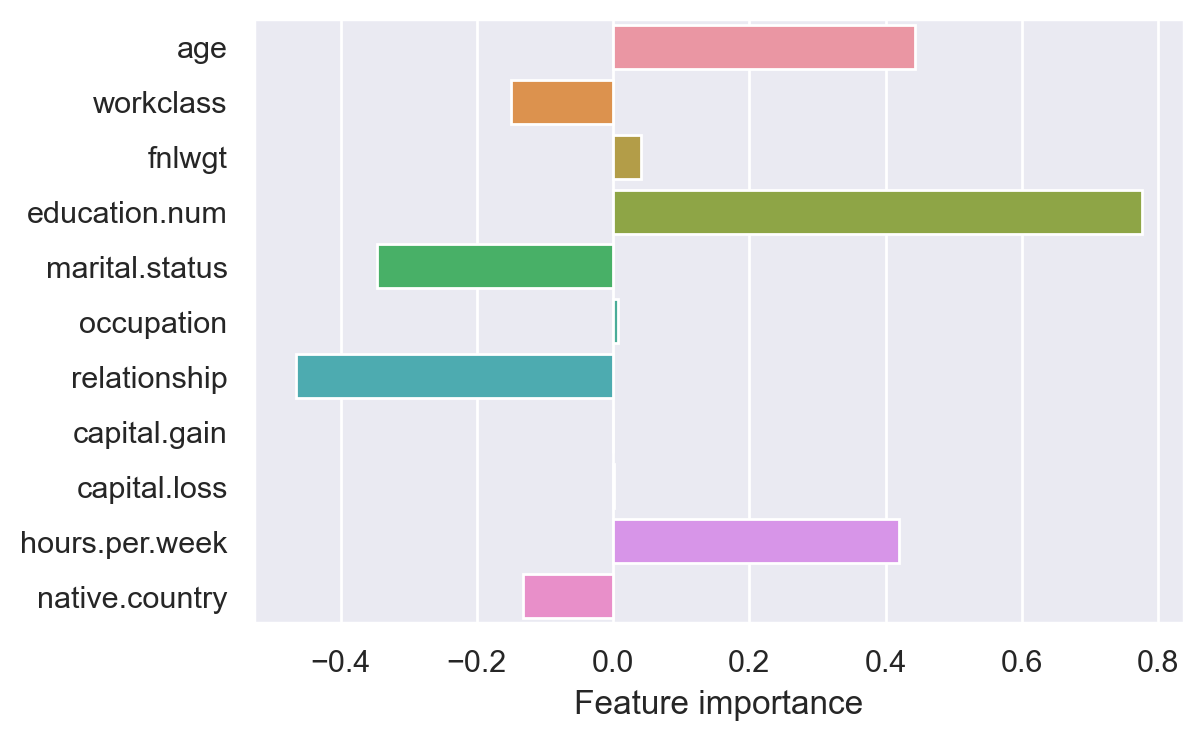

In [55]:
# get importance
importance = logistic.coef_[0]
importance = pd.DataFrame(importance.reshape(11,1))#, index=list(X_train.columns))

# plot feature importance
plt.figure(dpi=200)
sns.barplot(data=importance, y=list(X_train.columns), x=0)
plt.xlabel('Feature importance')
plt.show()

## Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier

# Number of trees 
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 400, num = 5)]

# Number of features to consider at every split m = sqrt(p)
max_features = ['log2', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 6, num = 1)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 4, 6]

# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4, 6]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [57]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(n_jobs=-1)

# Random search of parameters, using 3 fold cross validation, 
# search across 50 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50,
                               cv = 3, verbose=1, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train.values.ravel())

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [1, None],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [200, 250, 300, 350,
                                                         400]},
                   random_state=42, verbose=1)

In [58]:
accuracy = rf_random.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Accuracy for our training dataset with tuning is : 86.48%


In [59]:
print(rf_random.best_params_)

{'n_estimators': 250, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': None, 'bootstrap': True}


In [60]:
# Best random forest model
final_cl = RandomForestClassifier(
    **rf_random.best_params_,
verbose=1,n_jobs=-1)

scores = cross_validate(final_cl, X_train, y_train.values.ravel(), scoring=scoring,
                         cv=5,n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: 

In [61]:
acc = scores['test_acc'].mean()
prec = scores['test_prec_macro'].mean()
rec = scores['test_rec_macro'].mean()
f1 = scores['test_f1'].mean()
models['RandomForest'] = [acc,prec,rec,f1]
print('Average Accuracy in CV: {:.3f} \n'.format(acc))
print('Average Precision in CV: {:.3f} \n'.format(prec))
print('Average Recall in CV: {:.3f} \n'.format(rec))
print('Average F-1 in CV: {:.3f} \n'.format(f1))

Average Accuracy in CV: 0.865 

Average Precision in CV: 0.831 

Average Recall in CV: 0.783 

Average F-1 in CV: 0.802 



In [ ]:
print('Hence, the empirical error rate is: {:.2f} %'.format(( 1 - scores['test_acc'].mean() )*100))

## XGBoost

In [62]:
from xgboost import XGBClassifier


# Setting possible values for the multiple hyperparameters of XGBoost
random_grid = {
    "max_depth": [1, 2, 3],
    "learning_rate": [0.001,0.05,0.4, 0.5],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0.001, 1, 10],
    "scale_pos_weight": [0,1, 3],
    "subsample": [0.8],
    "colsample_bytree": [0.8],
    "n_estimators" : [int(x) for x in np.linspace(start = 300, stop = 600, num = 5)]

}

# Using  Boosted trees
bst = XGBClassifier(booster='gbtree',tree_method='exact',objective='binary:logistic',n_jobs=-1)

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = bst, param_distributions = random_grid, n_iter = 100,
                               cv = 3, verbose=1, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train.values.ravel())


Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster='gbtree',
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=N...
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None,
                                           reg_alpha=None, reg_lambda=None, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8],
                                        'gamma': [0, 0.25, 1],
                                        'learning_rate': [0.05, 0.4, 1, 0.5],
                                        'max_depth': [1, 2, 3],
                                        'n_estimators': [300, 375, 450, 525,
                                                         600],
                                        'reg_lambda': [0.001, 1, 10],
                                        'scale_pos_weight': [0, 1, 3],
                                        'subsample': [0.8]},
                   random_state=42, verbose=1)

In [63]:
accuracy = rf_random.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Accuracy for our training dataset with tuning is : 87.28%


In [64]:
print(rf_random.best_params_)

{'subsample': 0.8, 'scale_pos_weight': 1, 'reg_lambda': 1, 'n_estimators': 600, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 0.25, 'colsample_bytree': 0.8}


In [65]:
# Best xgboosting model
final_cl = XGBClassifier(
    **rf_random.best_params_,
    objective="binary:logistic",
    booster='gbtree',
    tree_method='exact',
    n_jobs=-1
)

scores = cross_validate(bst, X_train, y_train.values.ravel(), scoring=scoring,
                         cv=5, n_jobs=-1,verbose=1)

bst.fit(X_train, y_train.values.ravel())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.7s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.8s finished


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [66]:
acc = scores['test_acc'].mean()
prec = scores['test_prec_macro'].mean()
rec = scores['test_rec_macro'].mean()
f1 = scores['test_f1'].mean()
models['XGBoost'] = [acc,prec,rec,f1]
print('Average Accuracy in CV: {:.3f} \n'.format(acc))
print('Average Precision in CV: {:.3f} \n'.format(prec))
print('Average Recall in CV: {:.3f} \n'.format(rec))
print('Average F-1 in CV: {:.3f} \n'.format(f1))

Average Accuracy in CV: 0.869 

Average Precision in CV: 0.831 

Average Recall in CV: 0.796 

Average F-1 in CV: 0.811 



In [ ]:
print('Hence, the empirical error rate is: {:.2f} %'.format(( 1 - scores['test_acc'].mean() )*100))

### Feature importance

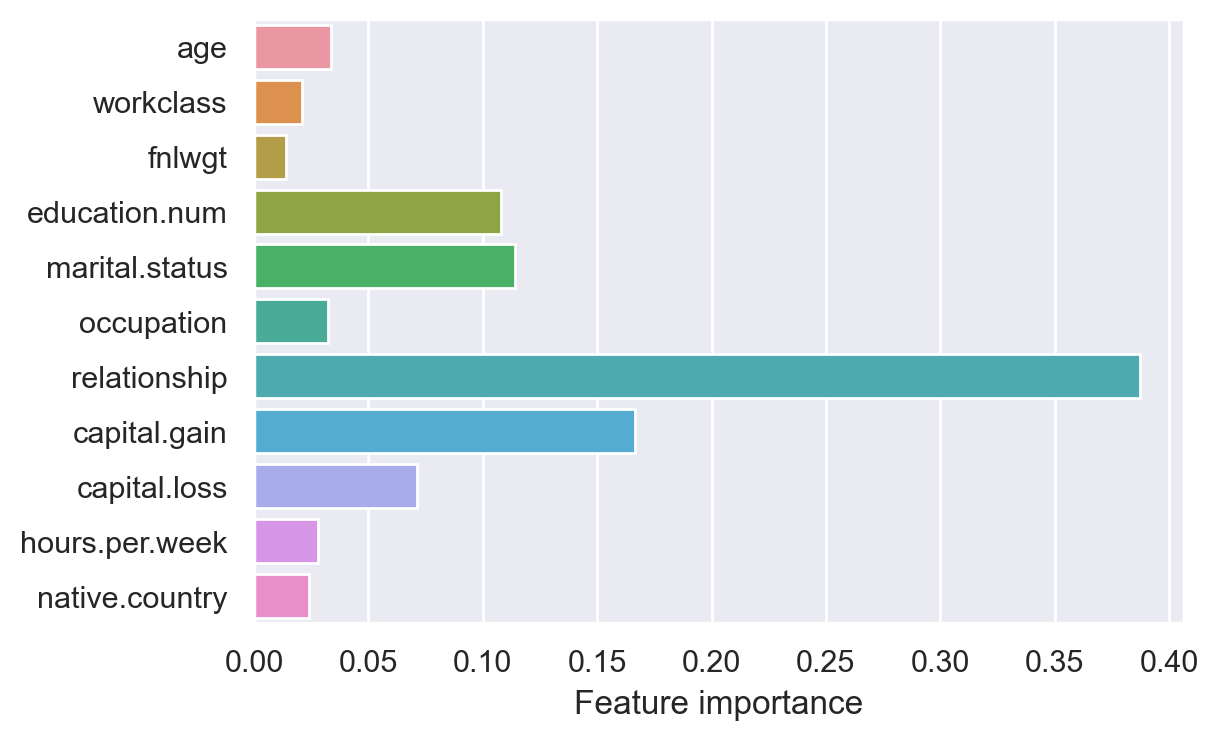

In [67]:
# get importance
importance = bst.feature_importances_
importance = pd.DataFrame(importance.reshape(11,1), index=list(X_train.columns))

# plot feature importance
plt.figure(dpi=200)
sns.barplot(data=importance, y=list(X_train.columns), x=0)
plt.xlabel('Feature importance')
plt.show()

### One Hot enconder to increase accuracy

Usually one hot enconder leads to a increase in accuracy, but in the cost of losing interpretability and feature importance

In [67]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X = onehotencoder.fit_transform(X_train[['workclass','education.num',
                                         'marital.status','occupation',
                                         'relationship','native.country']]).toarray()

X = pd.concat([X_train.loc[:, ~X_train.columns.isin(['workclass','education.num',
                                                           'marital.status','occupation',
                                                           'relationship','native.country'])],pd.DataFrame(X)],axis=1)


In [81]:
from xgboost import XGBClassifier


params = {'subsample': 0.8,
 'scale_pos_weight': 1,
 'reg_lambda': 0.0001,
 'n_estimators': 1000,
 'max_depth': 3,
 'learning_rate': 0.05,
 'gamma': 0.0001,
 'colsample_bytree': 0.8}

bst_one_hot = XGBClassifier(
    **params,
    objective="binary:logistic",
    booster='gbtree',
    tree_method='exact',
    n_jobs=-1
)
# Random search of parameters, using 3 fold cross validation, 
# search across 50 different combinations, and use all available cores

# rf_random = RandomizedSearchCV(estimator = bst, param_distributions = random_grid, n_iter = 150,
#                                cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model

bst_one_hot.fit(X, y_train.values.ravel())

scores = cross_validate(bst_one_hot, X, y_train.values.ravel(), scoring=scoring,
                         cv=5, n_jobs=-1, verbose=2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   31.8s remaining:   47.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   31.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   31.9s finished


In [82]:
acc = scores['test_acc'].mean()
prec = scores['test_prec_macro'].mean()
rec = scores['test_rec_macro'].mean()
f1 = scores['test_f1'].mean()
models['XGBoost one hot encod'] = [acc,prec,rec,f1]
print('Average Accuracy in CV: {:.4f} \n'.format(acc))
print('Average Precision in CV: {:.3f} \n'.format(prec))
print('Average Recall in CV: {:.3f} \n'.format(rec))
print('Average F-1 in CV: {:.3f} \n'.format(f1))

Average Accuracy in CV: 0.8708 

Average Precision in CV: 0.839 

Average Recall in CV: 0.790 

Average F-1 in CV: 0.810 

[CV] END .................................................... total time=  26.0s
[CV] END .................................................... total time=  53.2s
[CV] END .................................................... total time=  38.3s
[CV] END .................................................... total time=  26.2s
[CV] END .................................................... total time=  23.2s
[CV] END .................................................... total time=  34.9s
[CV] END .................................................... total time=  53.3s
[CV] END .................................................... total time=  15.0s
[CV] END .................................................... total time=  23.0s
[CV] END .................................................... total time=  53.4s
[CV] END .................................................... total

In [301]:
from xgboost import XGBClassifier

random_grid = {
    "max_depth": [1, 2, 3],
    "learning_rate": [0.001,0.05,0.4],
    "gamma": [0.0001, 0.25, 1],
    "reg_lambda": [0.0001,0.001, 1],
    "scale_pos_weight": [0,1, 3],
    "subsample": [0.8],
    "colsample_bytree": [0.8],
    "n_estimators" : [int(x) for x in np.linspace(start = 600, stop = 900, num = 5)]

}

bst = XGBClassifier(booster='gbtree',tree_method='exact',objective='binary:logistic',n_jobs=-1)

# Random search of parameters, using 3 fold cross validation, 
# search across 50 different combinations, and use all available cores

rf_random = RandomizedSearchCV(estimator = bst, param_distributions = random_grid, n_iter = 150,
                               cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model

rf_random.fit(X, y_train.values.ravel())


bst_one_hot = XGBClassifier(
    **rf_random.best_params_,
    objective="binary:logistic",
    booster='gbtree',
    tree_method='exact',
    n_jobs=-1
)

scores = cross_validate(bst_one_hot, X, y_train.values.ravel(), scoring=scoring,
                         cv=5, n_jobs=-1, verbose=2)

bst_one_hot.fit(X, y_train.values.ravel())


Fitting 3 folds for each of 150 candidates, totalling 450 fits
[CV] END colsample_bytree=0.8, gamma=0.0001, learning_rate=0.05, max_depth=1, n_estimators=300, reg_lambda=0.0001, scale_pos_weight=0, subsample=0.8; total time=   4.0s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.5, max_depth=2, n_estimators=600, reg_lambda=1, scale_pos_weight=0, subsample=0.8; total time=   9.1s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.001, max_depth=2, n_estimators=600, reg_lambda=0.001, scale_pos_weight=1, subsample=0.8; total time=  16.2s
[CV] END colsample_bytree=0.8, gamma=0.0001, learning_rate=0.4, max_depth=1, n_estimators=300, reg_lambda=0.0001, scale_pos_weight=1, subsample=0.8; total time=   5.5s
[CV] END colsample_bytree=0.8, gamma=0.25, learning_rate=0.4, max_depth=1, n_estimators=525, reg_lambda=1, scale_pos_weight=1, subsample=0.8; total time=   8.8s
[CV] END colsample_bytree=0.8, gamma=0.0001, learning_rate=0.001, max_depth=1, n_estimators=525, reg_lambda=0.0001, s

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   38.1s remaining:   57.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   38.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   38.1s finished


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.0001, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=3, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=-1, num_parallel_tree=1,
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=0.0001, ...)

In [302]:
rf_random.best_params_

{'subsample': 0.8,
 'scale_pos_weight': 1,
 'reg_lambda': 0.0001,
 'n_estimators': 750,
 'max_depth': 3,
 'learning_rate': 0.05,
 'gamma': 0.0001,
 'colsample_bytree': 0.8}

In [305]:
acc = scores['test_acc'].mean()
prec = scores['test_prec_macro'].mean()
rec = scores['test_rec_macro'].mean()
f1 = scores['test_f1'].mean()
models['XGBoost one hot encod'] = [acc,prec,rec,f1]
print('Average Accuracy in CV: {:.4f} \n'.format(acc))
print('Average Precision in CV: {:.3f} \n'.format(prec))
print('Average Recall in CV: {:.3f} \n'.format(rec))
print('Average F-1 in CV: {:.3f} \n'.format(f1))

Average Accuracy in CV: 0.8725 

Average Precision in CV: 0.841 

Average Recall in CV: 0.794 

Average F-1 in CV: 0.813 



In [306]:
print('Hence, the empirical error rate is: {:.2f} %'.format(( 1 - scores['test_acc'].mean() )*100))

Hence, the empirical error rate is: 12.75 %
[CV] END colsample_bytree=0.8, gamma=0.25, learning_rate=0.001, max_depth=2, n_estimators=650, reg_lambda=1, scale_pos_weight=3, subsample=0.8; total time=  18.6s
[CV] END colsample_bytree=0.8, gamma=0.25, learning_rate=0.001, max_depth=1, n_estimators=550, reg_lambda=0.001, scale_pos_weight=0, subsample=0.8; total time=   9.3s
[CV] END colsample_bytree=0.8, gamma=0.0001, learning_rate=0.05, max_depth=3, n_estimators=700, reg_lambda=0.0001, scale_pos_weight=0, subsample=0.8; total time=  12.3s
[CV] END colsample_bytree=0.8, gamma=0.0001, learning_rate=0.4, max_depth=1, n_estimators=600, reg_lambda=0.0001, scale_pos_weight=1, subsample=0.8; total time=  10.7s
[CV] END colsample_bytree=0.8, gamma=0.0001, learning_rate=0.05, max_depth=3, n_estimators=550, reg_lambda=1, scale_pos_weight=0, subsample=0.8; total time=   9.7s
[CV] END colsample_bytree=0.8, gamma=1, learning_rate=0.4, max_depth=1, n_estimators=650, reg_lambda=0.001, scale_pos_weight=

The model perform better using the one hot enconder

## Neural Network (Multi-Layer Perceptron) 

In [45]:
import tensorflow as tf
print(tf.__version__)

2.7.1


### One hot encoding for all categorical variables

In [61]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X = onehotencoder.fit_transform(X_train[['workclass','education.num',
                                         'marital.status','occupation',
                                         'relationship','native.country']]).toarray()

X = pd.concat([X_train.loc[:, ~X_train.columns.isin(['workclass','education.num',
                                                           'marital.status','occupation',
                                                           'relationship','native.country'])],pd.DataFrame(X)],axis=1)


### Cross-validation with NN

In [62]:
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax
from tensorflow.keras.layers import Dropout
from keras import regularizers

inputs = X
targets = y_train

acc_per_fold = []
loss_per_fold = []
scores = np.zeros((4,5))
# Define the K-fold Cross Validator
kfold = KFold(n_splits=5, shuffle=True)

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):
    
    # Defining the NN Archithecture
    
    layers = [64,50,1] # 5 layers with 64,32,4,1 layer respectively
    EPOCHS = 100
    BATCH_SIZE = 100
    input_shape = X.shape[1]
    model = Sequential([
      Dense(layers[0], activation='tanh',input_shape=(input_shape,),kernel_regularizer=regularizers.l2(0.01)),
      Dropout(0.5),
      Dense(layers[1],activation='tanh',kernel_regularizer=regularizers.l2(0.01)),
      Dense(layers[2],activation='sigmoid')
    ])
    
    model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])


    # Generate a print
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Fit data to model
    history = model.fit(inputs.iloc[train], targets.iloc[train],
              validation_data=(inputs.iloc[test], targets.iloc[test]),
              batch_size=BATCH_SIZE,
              epochs=EPOCHS,
              verbose=0)

    # Generate generalization metrics
    acc_loss = model.evaluate(inputs.iloc[test], targets.iloc[test], verbose=0)
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {acc_loss[0]}; {model.metrics_names[1]} of {acc_loss[1]*100}%')
    acc_per_fold.append(acc_loss[1] * 100)
    loss_per_fold.append(acc_loss[0])
    
    y_pred = (model.predict(inputs.iloc[test], verbose=0) > 0.5).astype("int32")
    scores[0][fold_no - 1] = accuracy_score(targets.iloc[test].values, y_pred)
    scores[1][fold_no - 1] = precision_score(targets.iloc[test].values, y_pred, average='macro')
    scores[2][fold_no - 1] = recall_score(targets.iloc[test].values, y_pred, average='macro')
    scores[3][fold_no - 1] = f1_score(targets.iloc[test].values, y_pred)

    # Increase fold number
    fold_no = fold_no + 1

------------------------------------------------------------------------
Training for fold 1 ...
Score for fold 1: loss of 0.3985477685928345; accuracy of 81.32678270339966%
------------------------------------------------------------------------
Training for fold 2 ...
Score for fold 2: loss of 0.3999330997467041; accuracy of 81.3421368598938%
------------------------------------------------------------------------
Training for fold 3 ...
Score for fold 3: loss of 0.3926863372325897; accuracy of 81.1117947101593%
------------------------------------------------------------------------
Training for fold 4 ...
Score for fold 4: loss of 0.39158016443252563; accuracy of 82.07923769950867%
------------------------------------------------------------------------
Training for fold 5 ...
Score for fold 5: loss of 0.3846583962440491; accuracy of 81.67997598648071%


In [63]:
acc = scores[0].mean()
prec = scores[1].mean()
rec = scores[2].mean()
f1 = scores[3].mean()
models['NN'] = [acc,prec,rec,f1]
print('Average Accuracy in CV: {:.2f} \n'.format(acc))
print('Average Precision in CV: {:.2f} \n'.format(prec))
print('Average Recall in CV: {:.2f} \n'.format(rec))
print('Average F-1 in CV: {:.2f} \n'.format(f1))

Average Accuracy in CV: 0.82 

Average Precision in CV: 0.75 

Average Recall in CV: 0.74 

Average F-1 in CV: 0.61 



In [64]:
print('Hence, the empirical error rate is: {:.2f} %'.format(( 1 - acc )*100))

Hence, the empirical error rate is: 18.49 %


### Visualizing the training process

[]

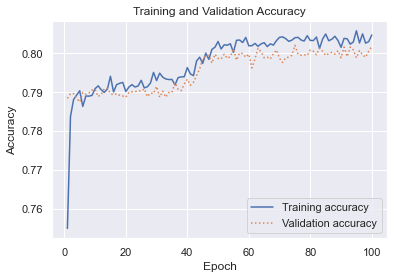

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
 
acc = history.history['accuracy']
val = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

## Comparing models

Checking which model perfomed the best in CV. I dediced to evaluate the **Accuracy Score**, **Recall**,**Precision** and **F1 Score**. But I will choose the model by its accuracy in CV.

In [76]:
df_models = pd.DataFrame.from_dict(models, orient='index')

In [77]:
df_models = df_models.rename(columns={ 0 : 'Accuracy', 1 : 'Precision', 2 : 'Recall', 3 : 'F1-Score'})
df_models

,Accuracy,Precision,Recall,F1-Score
Dummy,0.759183,0.379592,0.500000,0.431554
KNN,0.861057,0.823444,0.777175,0.796010
Logistic,0.822727,0.778316,0.691540,0.716788
RandomForest,0.865418,0.830680,0.782834,0.802262
XGBoost,0.869072,0.831252,0.796213,0.811313
XGBoost one hot encod,0.871898,0.841023,0.791804,0.811853
NN,0.708521,0.719620,0.725183,0.701206


Besides the simplicity of KNN, it's a great method compared to the others. However, we can see that **XGBoost with one hot encoder has the best performance**, benchmarking the other methods in almost all the evaluation metrics.

# Final model and test prediction

Exporting the prediction on the test set in a csv

In [171]:
onehotencoder = OneHotEncoder()
X = onehotencoder.fit_transform(X_test[['workclass','education.num',
                                         'marital.status','occupation',
                                         'relationship','native.country']]).toarray()


X = pd.concat([X_test.loc[:, ~X_test.columns.isin(['workclass','education.num',
                                                           'marital.status','occupation',
                                                           'relationship','native.country', 'Id'])],pd.DataFrame(X)],axis=1)

y_pred = bst_one_hot.predict(X)

In [172]:
result = pd.DataFrame(columns = ["Id","income"])

result.Id = df_test.Id
result.income = y_pred
result.income = result.income.replace(0, '<=50K')
result.income = result.income.replace(1, '>50K')
result.to_csv("submission.csv", index=False)

In [173]:
result

,Id,income
0,0,<=50K
1,1,>50K
2,2,<=50K
3,3,<=50K
4,4,>50K
...,...,...
16275,16275,<=50K
16276,16276,<=50K
16277,16277,<=50K
16278,16278,<=50K
